# RAG Pipeline Guide
 
This notebook demonstrates how to use your modular RAG pipeline architecture.

We'll go step by step, using only the components you've already built.


## 0. Setting up the code and the libraries

a. Initially you should create an .env at the root of the directory and put you OpenAI API (for this demo) in this format:

OPENAI_API_KEY=your_openai_api_key_here

b. install python3.9

c. install the venv virtual environment

python3.9 -m venv (name of environment)

d. activate the venv environment

source rag-pipeline/bin/activate

e. Install the dependencies from the requirements.txt file

pip install -r requirements.txt




## 1. Initial Setup

In [ ]:
# Basic imports
import sys
import os
from pathlib import Path

# Import your modules
from core.config import ConfigManager
from system.rag_system import ModularRAGSystem
from utils.helpers import create_project_directories, verify_api_keys

# Create directories
directories = create_project_directories()
print("\nDirectories created")

# Verify API keys
api_keys = verify_api_keys()


Created documents directory: ./documents
Created data directory: ./data
Created configs directory: ./configs
Created results directory: ./results
Created logs directory: ./logs

Directories created
OPENAI_API_KEY is configured
ANTHROPIC_API_KEY is not set


## 2. Configuration

In [ ]:

# Initialize configuration with default settings
config_manager = ConfigManager()

# Display current configuration
print("Current Configuration:")
config_manager.display_config()


Current Configuration:


### Current Configuration

**Retriever:**

  - type: vector
  - model: text-embedding-3-small
  - chunk_size: 500
  - chunk_overlap: 50
  - top_k: 5
  - search_type: similarity



**Generator:**

  - provider: openai
  - model: gpt-4o-mini
  - temperature: 0.0
  - max_tokens: 1000



**Evaluation:**

  - frameworks: ['ragas']
  - metrics: ['faithfulness', 'answer_relevancy']
  - sample_size: None



**Vector Store:**

  - faiss



**Pipeline Type:**

  - linear



## 3. Initialize RAG System

In [ ]:

# Create the RAG system
rag_system = ModularRAGSystem(config_manager)

# Initialize all components
rag_system.initialize_components()

print("\nRAG System initialized successfully!")

## Initializing RAG System Components

Document processor initialized
Initialized embeddings with model: text-embedding-3-small
Vector store manager initialized
Component factories initialized (Retriever and Generator)
Pipeline builder initialized
Initialized metric: faithfulness
Initialized metric: answer_relevancy
Evaluation orchestrator initialized

RAG System initialized successfully!


## 4. Load and Process Documents

## Document Processing

Loading PDFs from directory: `./documents`

Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 9 0 (offset 0)
Ignoring wrong pointing object 54 0 (offset 0)
Ignoring wrong pointing object 236 0 (offset 0)
Ignoring wrong pointing object 670 0 (offset 0)
Ignoring wrong pointing object 1329 0 (offset 0)
Ignoring wrong pointing object 1330 0 (offset 0)


### Loading Summary

Loaded 224 document pages


#### First Document Preview:

Source: documents/kb.pdf
Page: 0
Content preview: RAG KNOWLEDGE BASE 
 
Explaining the Streamlit platform 
 
1. Experiment design tab: calculating sample sizes before running an 
experiment 
Purpose: Before launching an A/B test, we want to calculate...


### Chunking Summary

Created 1161 chunks from 224 documents
Average chunk size: 418 characters


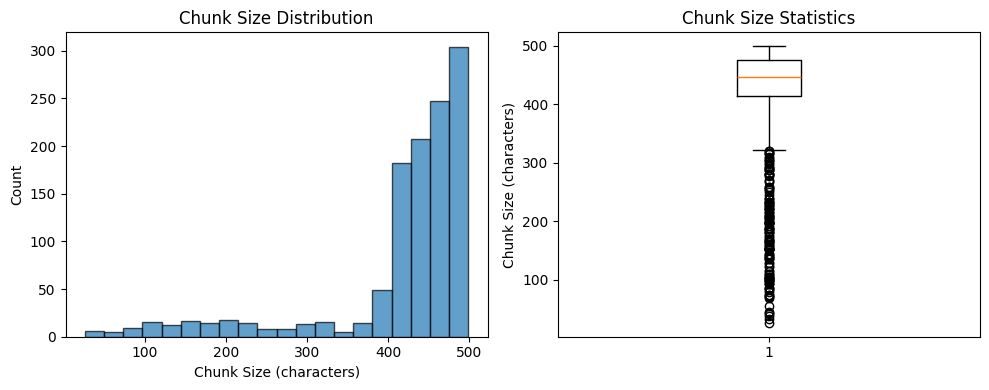


Chunk Statistics:
  - Min size: 26 chars
  - Max size: 499 chars
  - Mean size: 418 chars
  - Total chunks: 1161

Processed 1161 chunks


In [ ]:
# Set the path to your documents
PDF_PATH = "./documents"  # Make sure you have PDFs (the knowledge base in this case) in this folder

# Check if documents exist
if Path(PDF_PATH).exists() and list(Path(PDF_PATH).glob("*.pdf")):
    # Load and process documents
    chunks = rag_system.load_and_process_documents(PDF_PATH)
    print(f"\nProcessed {len(chunks)} chunks")
else:
    print(f"\nNo PDF files found in {PDF_PATH}")
    print("Please add PDF files to the documents folder and run this cell again")
    chunks = []

## 5. Create Vector Store

In [ ]:
# Create vector store only if we have chunks
if chunks:
    # Create new vector store
    vector_store = rag_system.create_or_load_vector_store(chunks, force_rebuild=True)
    print("\nVector store created")
    
    # Test retrieval
    rag_system.vs_manager.test_retrieval("What is the main topic?")
else:
    print("No chunks available. Cannot create vector store.")

## Vector Store Management

### Creating FAISS Vector Store

Processing 1161 chunks...
FAISS index saved to: ./data/faiss_index
Vector store created successfully

Vector store created


### Testing Retrieval

Query: 'What is the main topic?'
Retrieving top 3 documents...



#### Result 1 (Score: 1.3280)

Source: documents/kb.pdf
Page: 89
Chunk: 468
Content: Why does this happen? Three main reasons:...



#### Result 2 (Score: 1.3697)

Source: documents/kb.pdf
Page: 22
Chunk: 89
Content: specific topic, or simply browse. Whatever the visitor’s goal may be, they may face some common 
pain points while achieving their goal. It can be a confusing copy or hard to find the CTA button like ...



#### Result 3 (Score: 1.4483)

Source: documents/kb.pdf
Page: 26
Chunk: 122
Content: A/B test content depth. Creating two pieces of the same content, one that’s significantly longer than 
the other, provides more details. Analyze which compels your readers the most....



## 6. Build Pipeline

In [ ]:
# Build a linear pipeline (simplest option)
if rag_system.retriever_factory.vector_store:
    pipeline = rag_system.build_pipeline("linear")
    print("\nPipeline built successfully!")
else:
    print("No vector store available. Cannot build pipeline.")

## Building RAG Pipeline

Created vector retriever
Created openai generator
Built linear pipeline

Pipeline built successfully!


## 7. Test Queries

In [ ]:
# Test with a simple query
import asyncio

if rag_system.pipeline:
    test_question = "What is A/B Testing?"
    
    # Run query
    result = asyncio.run(rag_system.query(test_question, evaluate=True))
    
    print(f"\nQuery Results:")
    print(f"- Response time: {result['response_time']:.2f} seconds")
    print(f"- Contexts used: {result['num_contexts']}")
else:
    print("Pipeline not available")

### Query: What is A/B Testing?

### Answer:
A/B testing, also known as split testing or bucket testing, is a methodology used to compare two versions of a webpage or app to determine which one performs better. Here are the key points:

- **Purpose**: It aims to improve conversion rates and increase income by identifying which version (A or B) is more effective.
- **Process**:
  - Two versions are created: the original (control or A) and a modified version (variation or B).
  - Traffic is randomly split between these versions.
  - User engagement is measured through a dashboard.
  - Results are analyzed to see if the changes had positive, negative, or neutral effects.
- **Applications**: A/B testing can be used to test various elements such as website layouts, email subject lines, product designs, and call-to-action button text.

Overall, A/B testing allows for data-backed decisions rather than relying on guesswork, helping to optimize user experience and business metrics.


Response time: 4.89 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: False
Metrics to evaluate: ['faithfulness', 'answer_relevancy']
Evaluating faithfulness...
faithfulness score: 1.0
Evaluating answer_relevancy...
answer_relevancy score: 0.9614572833940741


#### RAGAS Metrics

,faithfulness,answer_relevancy
0,1.0,0.961457


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.738488,0.369458,0.037495



Query Results:
- Response time: 4.89 seconds
- Contexts used: 5


## 8. Evaluation without References

In [ ]:
# Make sure we're only using metrics that don't need references
if rag_system.pipeline:
    # Update config to use only faithfulness and answer_relevancy
    config_manager.config.evaluation.metrics = ['faithfulness', 'answer_relevancy']
    
    # Re-initialize RAGAS evaluator
    from evaluation.ragas_evaluator import RAGASEvaluator, RAGAS_AVAILABLE
    
    if RAGAS_AVAILABLE:
        rag_system.eval_orchestrator.evaluators['ragas'] = RAGASEvaluator(config_manager.config.evaluation)
        print("RAGAS evaluator updated with metrics:", config_manager.config.evaluation.metrics)
    
    # Test questions
    test_questions = [
        "What is hypothesis testing?",
        "Why do we use Two-Sample T-Test?",
        "Does the data need to be normalised before using Two-Sample T-Test?"
    ]
    
    # Run evaluation
    for question in test_questions[:2]:
        print(f"\nQuestion: {question}")
        result = asyncio.run(rag_system.query(question, evaluate=True))
        print(f"Evaluation complete")

Initialized metric: faithfulness
Initialized metric: answer_relevancy
RAGAS evaluator updated with metrics: ['faithfulness', 'answer_relevancy']

Question: What is hypothesis testing?


### Query: What is hypothesis testing?

### Answer:
Hypothesis testing, commonly known in the context of A/B testing, is a statistical procedure used to determine whether a "speculative hypothesis" about observed phenomena can be supported. The process involves:

- Conducting tests to assess if the results align reasonably with the speculated hypothesis.
- Assuming, by statistical convention, that the speculated hypothesis is true until evidence suggests otherwise.

The focus of hypothesis testing has traditionally been on testing null hypotheses, which has been termed "Null Hypothesis Significance Testing" (NHST). This approach has been critiqued for its exclusive emphasis on null hypotheses, potentially overshadowing other aspects of statistical analysis. 

In summary, hypothesis testing is a method to evaluate the validity of a hypothesis based on observed data, with a significant historical focus on null hypotheses.


Response time: 3.22 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: False
Metrics to evaluate: ['faithfulness', 'answer_relevancy']
Evaluating faithfulness...
faithfulness score: 0.9090909090909091
Evaluating answer_relevancy...
answer_relevancy score: 0.9214423322931148


#### RAGAS Metrics

,faithfulness,answer_relevancy
0,0.909091,0.921442


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.684967,0.270115,0.594224


Evaluation complete

Question: Why do we use Two-Sample T-Test?


### Query: Why do we use Two-Sample T-Test?

### Answer:
The Two-Sample t-Test is used for the following reasons:

- **Testing Population Means**: It tests whether the unknown population means of two groups are equal or not.
- **Analyzing A/B Tests**: It is specifically used to analyze the results from A/B tests.
- **Statistical Significance**: It determines if there is a statistically significant difference between the means of a continuous outcome in two independent groups.
- **Hypothesis Testing**: It allows for the formulation of null and alternative hypotheses regarding the equality of group means.

In summary, the Two-Sample t-Test is a method for assessing differences in means between two independent groups, particularly useful in experimental designs like A/B testing.


Response time: 3.71 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: False
Metrics to evaluate: ['faithfulness', 'answer_relevancy']
Evaluating faithfulness...
faithfulness score: 0.8571428571428571
Evaluating answer_relevancy...
answer_relevancy score: 0.9751572539379456


#### RAGAS Metrics

,faithfulness,answer_relevancy
0,0.857143,0.975157


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.783171,0.273333,0.42994


Evaluation complete


## 9. Evaluation with References (Optional)

In [ ]:
# If you want to test all RAGAS metrics, you need reference answers
test_with_references = [
    {
        "question": "What is hypothesis testing?",
        "reference": "Hypothesis testing is a statistical method used to make inferences or draw conclusions about a population based on sample data. It involves formulating a null and an alternative hypothesis and using data to decide which hypothesis is more likely."
    },
    {
        "question": "Why do we use Two-Sample T-Test?",
        "reference": "A Two-Sample T-Test is used to compare the means of two independent groups to determine if there is statistical evidence that the associated population means are significantly different. It helps evaluate whether observed differences in sample means reflect real differences in population means or are due to random chance."
    },
    {
        "question": "Does the data need to be normalised before using Two-Sample T-Test?",
        "reference": "Normalization is not strictly required for a Two-Sample T-Test, but the data should be approximately normally distributed, especially for small sample sizes. The test also assumes equal variances in the two groups unless you use Welch’s T-Test, which adjusts for unequal variances."
    }
]


# First, update config to include all metrics
config_manager.config.evaluation.metrics = ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']

# Re-initialize evaluator with all metrics
if RAGAS_AVAILABLE:
    rag_system.eval_orchestrator.evaluators['ragas'] = RAGASEvaluator(config_manager.config.evaluation)
    print("RAGAS evaluator updated with ALL metrics")

# Run evaluation with reference
for item in test_with_references:
    print(f"\nQuestion: {item['question']}")
    result = asyncio.run(rag_system.query(
        item['question'], 
        evaluate=True, 
        reference=item['reference']  # Pass reference for full evaluation
    ))

Initialized metric: faithfulness
Initialized metric: answer_relevancy
Initialized metric: context_precision
Initialized metric: context_recall
RAGAS evaluator updated with ALL metrics

Question: What is hypothesis testing?


### Query: What is hypothesis testing?

### Answer:
Hypothesis testing, commonly known in the context of A/B testing, is a statistical procedure used to determine whether a "speculative hypothesis" about observed phenomena can be supported. The process involves:

- Conducting tests to assess if the results align reasonably with the speculated hypothesis.
- Assuming, by statistical convention, that the speculated hypothesis is true until evidence suggests otherwise.

Additionally, there is a focus on testing null hypotheses, which has been termed "Null Hypothesis Significance Testing" (NHST). This approach has been critiqued for its exclusive focus on null hypotheses, which may detract from broader statistical understanding. 

Overall, hypothesis testing serves as a framework for evaluating the validity of hypotheses based on observed data.


Response time: 4.69 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: True
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']
Evaluating faithfulness...
faithfulness score: 1.0
Evaluating answer_relevancy...
answer_relevancy score: 0.9252003802331954
Evaluating context_precision...
context_precision score: 0.499999999975
Evaluating context_recall...
context_recall score: 1.0


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision,context_recall
0,1.0,0.9252,0.5,1.0


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.737558,0.281609,0.103352



Question: Why do we use Two-Sample T-Test?


### Query: Why do we use Two-Sample T-Test?

### Answer:
The Two-Sample t-Test is used for the following reasons:

- **Testing Population Means**: It tests whether the unknown population means of two groups are equal or not.
- **Analyzing A/B Tests**: It is specifically used to analyze the results from A/B tests.
- **Statistical Significance**: It determines if there is a statistically significant difference between the means of a continuous outcome in two independent groups.
- **Hypothesis Testing**: It allows for the formulation of null and alternative hypotheses regarding the equality of group means.

In summary, the Two-Sample t-Test is a method for assessing differences in means between two independent groups, particularly useful in experimental designs like A/B testing.


Response time: 4.60 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: True
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']
Evaluating faithfulness...
faithfulness score: 0.8571428571428571
Evaluating answer_relevancy...
answer_relevancy score: 0.9752421485015194
Evaluating context_precision...
context_precision score: 0.9999999999666667
Evaluating context_recall...
context_recall score: 1.0


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision,context_recall
0,0.857143,0.975242,1.0,1.0


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.783171,0.273333,0.133017



Question: Does the data need to be normalised before using Two-Sample T-Test?


### Query: Does the data need to be normalised before using Two-Sample T-Test?

### Answer:
The data does not necessarily need to be normalized before using the Two-Sample T-Test. The context states that if normality cannot be assumed, one can perform a nonparametric test instead. Specifically, it mentions:

- "When you cannot safely assume normality, you can perform a nonparametric test that doesn’t assume normality."
- "What if you know the underlying measurements are not normally distributed? ... you can use nonparametric analyses."

Thus, while normality is an assumption for the t-test, it is not a strict requirement if nonparametric methods are used instead.


Response time: 3.95 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: True
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']
Evaluating faithfulness...
faithfulness score: 1.0
Evaluating answer_relevancy...
answer_relevancy score: 0.0
Evaluating context_precision...
context_precision score: 0.9999999999666667
Evaluating context_recall...
context_recall score: 1.0


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision,context_recall
0,1.0,0.0,1.0,1.0


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.929331,0.195652,0.351047


## 10. View Results


Evaluation Summary:
                    timestamp  \
0  2025-07-22T12:55:42.571788   
1  2025-07-22T12:56:16.517263   
2  2025-07-22T12:58:33.786713   
3  2025-07-22T12:58:57.610086   
4  2025-07-22T13:00:48.324819   
5  2025-07-22T13:01:26.950680   
6  2025-07-22T13:01:58.483422   

                                            question  response_time  \
0           What is the main topic of this document?       8.685106   
1                               What is A/B Testing?       4.887515   
2                        What is hypothesis testing?       3.217328   
3                   Why do we use Two-Sample T-Test?       3.710181   
4                        What is hypothesis testing?       4.689944   
5                   Why do we use Two-Sample T-Test?       4.600950   
6  Does the data need to be normalised before usi...       3.946858   

   ragas_faithfulness  ragas_answer_relevancy  custom_answer_length  \
0            1.000000                0.869471              0.490036   
1  

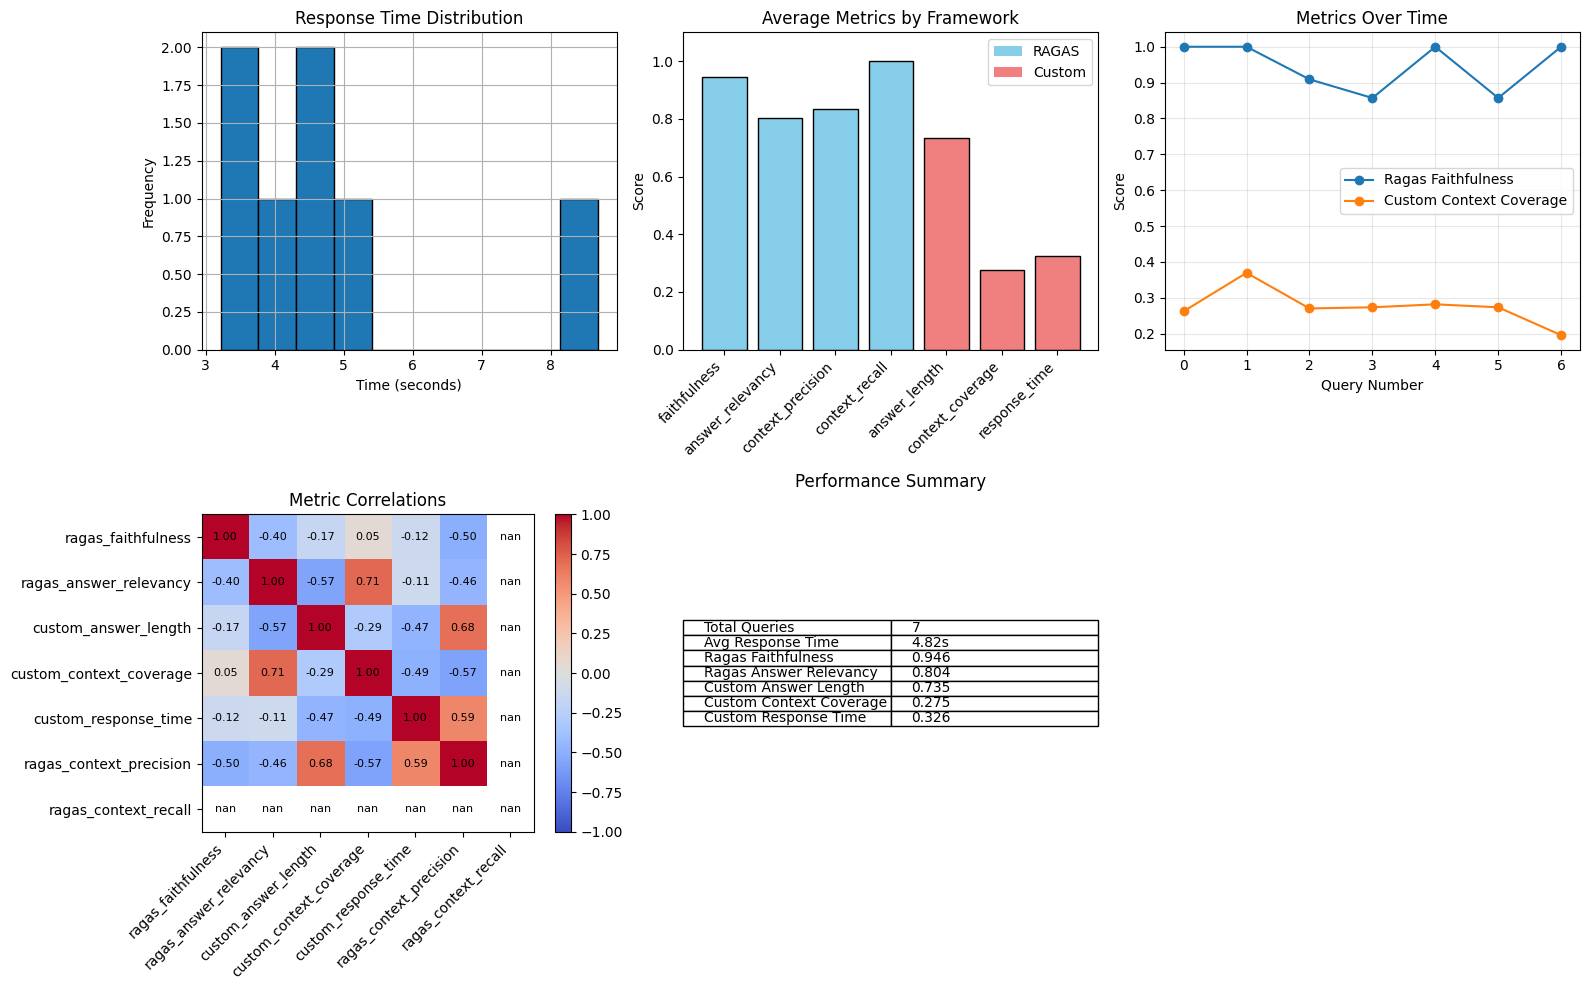

In [ ]:
# Get evaluation summary
if rag_system.eval_orchestrator.results_history:
    from analysis.results import ResultsAnalyzer
    
    results_analyzer = ResultsAnalyzer(rag_system.eval_orchestrator)
    
    # Show summary
    summary_df = rag_system.eval_orchestrator.get_results_summary()
    print("\nEvaluation Summary:")
    print(summary_df)
    
    # Create visualizations
    results_analyzer.create_performance_dashboard()
else:
    print("No evaluation results yet")